In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import keras
from sklearn.utils import shuffle
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPool2D
from tensorflow.keras.datasets import mnist
print(tf.__version__)


1.15.2


In [2]:
import core_modules

270 556


In [3]:

batch_size = 16
num_classes = 3 #added 

# the data, split between train and test sets
p = 0.8

n, (x_train, y_train), (x_test, y_test) = core_modules.load_data(p)

x_train, y_train = shuffle(x_train, y_train)


x_train =  x_train.reshape((int(p*n),270,556,1))
x_test  =  x_test.reshape((1-int(p*n),270,556,1))

class_names= []
for i in range(0,n):
    class_names.append(str(i))

# Showing a few examples
#show_image_examples(class_names, x_train, y_train)


x_train, x_test = x_train / 255.0, x_test / 255.0



0
1000
2000
3000
4000
5000
6000
7000
8000
8512 Images loaded across 3 Categories


In [4]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(4, kernel_size=(7,7), padding='same', activation='relu', input_shape=(270,556, 1)),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(16, kernel_size=(7,7), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(32, kernel_size=(7,7), activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=(3,3)),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(84, activation='relu'),
    tf.keras.layers.Dense(20, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

model.compile(optimizer=keras.optimizers.Adam(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 270, 556, 4)       200       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 90, 185, 4)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 179, 16)       3152      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 59, 16)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 53, 32)        25120     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 17, 32)         0         
_________________________________________

In [5]:
print(num_classes)

3


In [6]:
history = model.fit(x_train, y_train,  batch_size=20, validation_split=0.2,epochs=8)

score = model.evaluate(x_test,  y_test, verbose=2)

print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('\nHistory dict:', history.history)

Train on 5447 samples, validate on 1362 samples
Epoch 1/8
5447/5447 [==============================] - 41s 8ms/sample - loss: 0.7885 - sparse_categorical_accuracy: 0.5928 - val_loss: 0.7989 - val_sparse_categorical_accuracy: 0.5756
Epoch 2/8
5447/5447 [==============================] - 46s 8ms/sample - loss: 0.7318 - sparse_categorical_accuracy: 0.6409 - val_loss: 0.6951 - val_sparse_categorical_accuracy: 0.6681
Epoch 3/8
5447/5447 [==============================] - 45s 8ms/sample - loss: 0.6768 - sparse_categorical_accuracy: 0.6855 - val_loss: 0.6722 - val_sparse_categorical_accuracy: 0.6894
Epoch 4/8
5447/5447 [==============================] - 39s 7ms/sample - loss: 0.6417 - sparse_categorical_accuracy: 0.7041 - val_loss: 0.6425 - val_sparse_categorical_accuracy: 0.7122
Epoch 5/8
5447/5447 [==============================] - 39s 7ms/sample - loss: 0.6131 - sparse_categorical_accuracy: 0.7136 - val_loss: 0.6612 - val_sparse_categorical_accuracy: 0.6990
Epoch 6/8
5447/5447 [===========

1703/1703 - 3s - loss: 0.5831 - sparse_categorical_accuracy: 0.7475
0.7475044


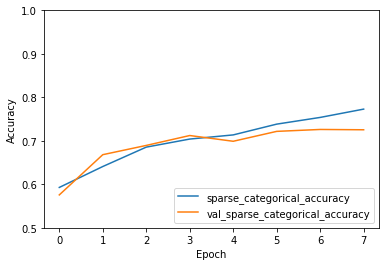

In [7]:
plt.plot(history.history['sparse_categorical_accuracy'], label='sparse_categorical_accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label = 'val_sparse_categorical_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)

In [10]:

loss, acc = model.evaluate(x_test,  y_test, verbose=2)
print('Restored model, accuracy: {:5.2f}%'.format(100*acc))

1703/1703 - 3s - loss: 0.5831 - sparse_categorical_accuracy: 0.7475
Restored model, accuracy: 74.75%


In [8]:
y_test[-690]

2

In [11]:
keras_model_path = "/home/ec2-user/SageMaker/ECG_Model/out/cnnV3_11_epochs.h5"
model.save(keras_model_path)  # save() should be called out of strategy scope